# HW3


Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [183]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
%matplotlib inline

In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [185]:
def sigmoid(x):
    # From Lecture 9 slides:
    y = 1 / (1 + np.exp(-x))

    return y

Let's try your implementation of the sigmoid function on the following values to make sure it is working fine:

1. x = -1.5
2. x = 0
3. x = 2.5

In [186]:
print('sigmoid(-1.5) = ', sigmoid(-1.5))
print('sigmoid(0) = ', sigmoid(0))
print('sigmoid(2.5) = ', sigmoid(2.5))

sigmoid(-1.5) =  0.18242552380635635
sigmoid(0) =  0.5
sigmoid(2.5) =  0.9241418199787566


Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [187]:
#Your linear model from HW2
def model(x,w):
    # From Lecture 4 slides, linear regression is given by the equation x^T*w ~= y_predicted:
    y_predicted = w[0] + np.dot(x.T,w[1:])

    return y_predicted

#The logistic regression cross entropy cost
def cross_entropy(w,x,y):
  # Following Lecture 10 slides:
    cost = -(1.0/float(y.size))*(np.sum((y*np.log(sigmoid(model(x,w)))) + (1-y)*(np.log(1-sigmoid(model(x,w))))))

    return cost

Run the code below to read a data file and plot a scatter plot of x vs y.

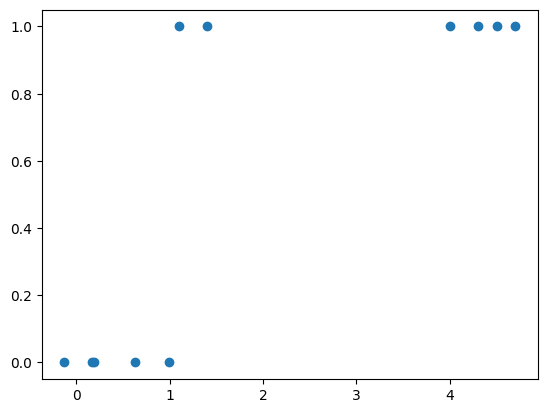

In [188]:
csvname = '/content/drive/My Drive/Colab Notebooks/2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
y = data[-1:,:]

# Plot scatter:
plt.scatter(x,y)

plt.show()

Q3) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=1500,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [189]:
#gradient descent function
#inputs: g (cost function), alpha (learning rate parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha,max_its,w,x,y):

    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    wk = w #Setting our first value of w to the initial input value, w

    #Initialize storage arrays:
    cost_history = [g(wk,x,y)]  #This array will store the cost value from each iteration; initialize with cost of w
    weight_history = [wk]  #values of w are parameters, also called weights, so weight_history will store each iteration of wk

    for k in range(max_its):
        ##Gradient descent algorithm is given by: w^k = w^(k-1) + -α∇g(w^(k-1))
        deriv_val = gradient(wk,x,y)
        wk = wk - alpha*deriv_val  #Update wk based on previous val of wk (i.e. w^k-1)

        cost_val = g(wk,x,y)  #Calculate new cost using cost function g(w)

        cost_history.append(cost_val)
        weight_history.append(wk)


    return weight_history,cost_history

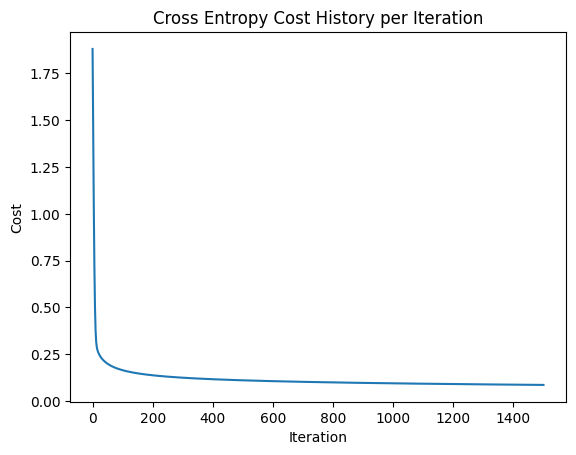

In [190]:
##Call the gradient_descent function here
max_its = 1500
w = np.array([3.0,3.0])
alpha = 1

weights, costs = gradient_descent(cross_entropy,alpha,max_its,w,x,y)

##Plot the cost history here
plt.plot(costs)

# Format plot:
plt.title("Cross Entropy Cost History per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

Q4) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [191]:
def logistic_regression(learned_w,x):
    #your code here
    positive_class_prob = sigmoid(model(x, learned_w))

    return positive_class_prob

Q5) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from before.


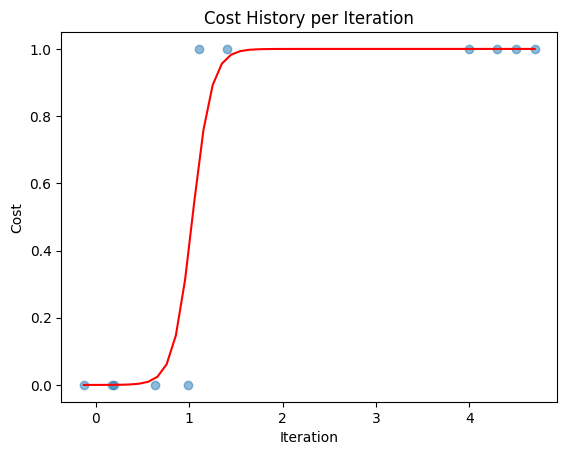

In [192]:
s = np.linspace(np.min(x),np.max(x))
#print('Weights: ', weights[-1])
#print('\nS: ', np.array([s]))

lr = logistic_regression(weights[-1], np.array([s]))
# We wrap s in np.array([]) in order to make it the same shape as weights,
  # i.e. one row with 50 columns as opposed to a 1D array
# Use the last value of weights as usually the most accurately learned weight

# Plot learned curve:
plt.plot(s, lr, color='red')

# Plot original scatter plot:
plt.scatter(x,y,alpha=0.5)

# Format plot:
plt.title("Cost History per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()


Q6) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [193]:
def logistic_regression_modified(learned_w,x, threshold):
    #your code here
    probabilities = sigmoid(model(x, learned_w))

    class_label = []

    for prob in probabilities:
      if prob > threshold:
        class_label.append(1)
      else:
        class_label.append(0)


    return class_label

Q7) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [194]:
def evaluate(y_actual,y_pred):
    ## Following Lecture 9 slides:
    """
    Our confusion matrix takes the form:
    [A=TP  B=FN]
    [C=FP  D=TN]
    where x-label = predicted label (-1,+1); y-label = actual label (-1,+1)

    Accuracy is given as: (TP+TN)/(TP+FN+TN+FP)
    """
    true_positive = 0
    false_positive = 0
    false_negative = 0
    true_negative = 0

    for actual,predicted in zip(y_actual.flatten(),y_pred):
      if actual == 1 and predicted == 1:
        true_positive += 1
      elif actual == 1 and predicted == 0:
        false_negative += 1
      elif actual == 0 and predicted == 0:
        true_negative += 1
      elif actual == 0 and predicted == 1:
        false_positive += 1

    accuracy = (true_positive+true_negative)/(true_positive+false_negative+true_negative+false_positive)

    return false_positive, false_negative, true_positive, true_negative, accuracy

In [195]:
# Now reporting the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5:
threshold = 0.5

# Get the predicted labels using modified log regression and evaluate:
labels = logistic_regression_modified(weights[-1], x, threshold)
eval = evaluate(y, labels)

# Print results:
print('Confusion matrix: \n', [eval[2], eval[1]], '\n', [eval[0], eval[3]])
print('\nAccuracy: ', eval[4])

Confusion matrix: 
 [6, 0] 
 [0, 5]

Accuracy:  1.0


Q8) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [196]:
def perceptron_cost(w,x,y):
   # From Lecture 9 slides:
   cost = np.sum(np.log(1 + np.exp(-y*model(x,w)))) / float(y.size)

   return cost

Q9) [10 points]
* Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=1500,w=[1.0,1.0], and alpha=1.0.
* Save the cost and weight history returned by the gradient descent function.
* Plot the cost history.
* Answer: Which cost seems to do better on this dataset? Why do think that is?


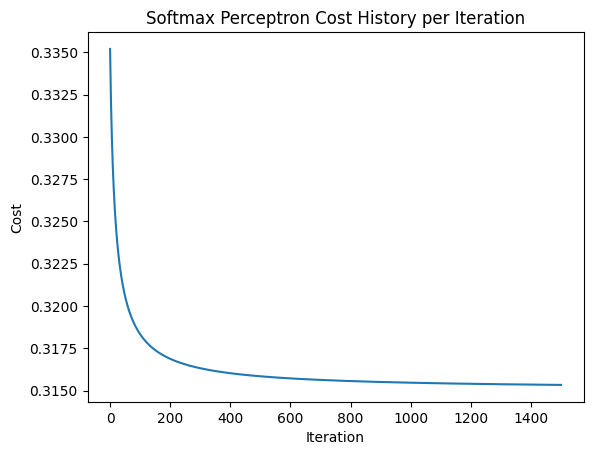

In [197]:
##Call the gradient_descent function here
max_its = 1500
w = np.array([1.0,1.0])
alpha = 1.0

weight_perc, cost_perc = gradient_descent(perceptron_cost,alpha,max_its,w,x,y)

##Plot the cost history here
plt.plot(cost_perc)

# Format plot:
plt.title("Softmax Perceptron Cost History per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")

plt.show()

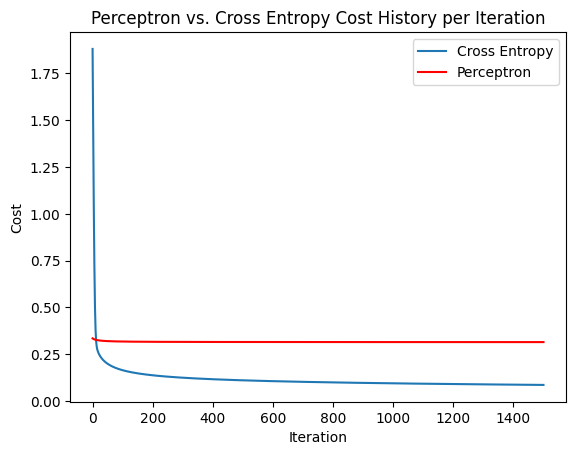

In [198]:
# Plotting the two costs for comparison:
plt.plot(costs, label='Cross Entropy')
plt.plot(cost_perc, color='red', label='Perceptron')

# Format plot:
plt.title("Perceptron vs. Cross Entropy Cost History per Iteration")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(loc='upper right')

plt.show()

<font color='red'>Based on the above graph of costs, it seems that the **cross-entropy model provides better results** with gradient descent. The cross entropy data converges at a lower/closer to zero cost, which indicates that the model is more effective at minimizing prediction errors when using gradient descent--in short, it is fitting the data better. Furthermore, as elaborated upon in Lecture 7-8 slides, for a linear binary classification framework (which Logisitic Regression is), cross-entropy is the most commonly used cost function, which speaks to its effectiveness.

Q10) [11 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns.

* Read the data file. (Note that the first line is the header describing each column.)
* Use the data above to set y to be the "target" and X to be the remaining columns.
* Split your data into 80% train 20% test using train_test_split.
* Use sklearn to fit a logistic regression model on your training set. Use all the default parameters. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [199]:
## import logistic regression and the train_test split functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd

##Your code here (basing off of code from HW2):

# Reading the data: (using pd since NumPy doesn't support multi-data types well)
heart_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')
heart_data.head()

# Defining x and y:
y = heart_data['target']
x = heart_data[['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']]  # Features

# Split into trains and tests:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2, random_state=34352)

# Train + fit the model:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_x, train_y)

LogisticRegression(max_iter=1000)

Q11) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [200]:
##Your code here
predicted_prob = log_reg.predict_proba(test_x)

Q12) [12 points]

Now you will report your results.

* Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. (I.e., you should no longer have tuples.)
* Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters).
* Print out the thresholds generated by the roc_curve function.
* Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score.

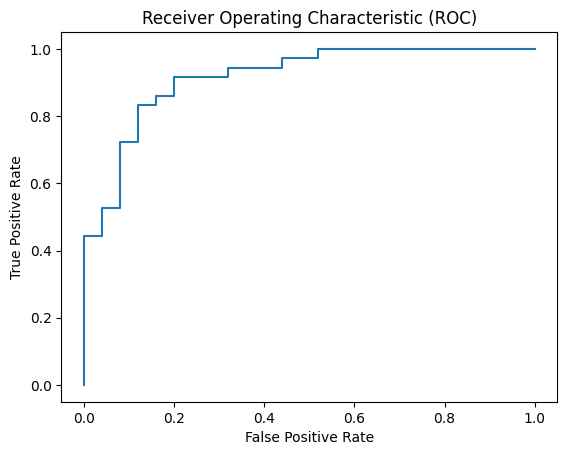

In [201]:
from sklearn.metrics import roc_curve
##Your code here

# Filter the predicted probabilties to only the probabilites for class 1:
predicted_prob_class1 = predicted_prob[:, 1]  # Class 1 is data from the second column of predicted_prob

# Use the roc_curve function to plot the ROC curve:
fpr, tpr, thresholds = roc_curve(test_y, predicted_prob_class1, pos_label=1)

plt.plot(fpr,tpr)

# Format plot:
plt.title("Receiver Operating Characteristic (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

In [202]:
from sklearn.metrics import roc_auc_score

# Print out the thresholds generated by the roc_curve function:
print('Thresholds:\n', thresholds)

# Use the roc_auc_score function:
auc = roc_auc_score(test_y, predicted_prob_class1)
print('\nArea Under Curve:\n', auc)

Thresholds:
 [       inf 0.98931486 0.91035339 0.89646085 0.82087973 0.80797895
 0.71087354 0.64140914 0.55754575 0.54859018 0.49801976 0.48221518
 0.43896093 0.10321889 0.10071931 0.06909287 0.06796022 0.05913427
 0.05360483 0.00187719]

Area Under Curve:
 0.9166666666666666
